## Exploratory Analysis - EDA

## Dataset 


This dataset usage for Kaggle InClass Competition Telecom Churn Analytics. 


The dataset used of this coding,you can downloading in this link.

https://www.kaggle.com/c/churn-analytics-bda

Links:

https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
    

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import warnings 
import plotly as py
from matplotlib import pyplot
import seaborn as sns
import missingno as msno
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import somoclu
from pandas.tools.plotting import scatter_matrix

warnings.simplefilter("ignore")
%matplotlib inline

In [15]:
train = pd.read_csv('Datasets/churnTrain.csv')
test = pd.read_csv('Datasets/churnTest.csv')

In [16]:
# Adiciona coluna Churn no dataset de teste para poder fazer merge entre os dois.
test['Churn'] = 'TESTE'
dataframes = [train, test]
churnData = pd.concat(dataframes) 

#### Null and Nan values treatment. 
 Applied mean in numerical variables and 'no' in variables Voice Mail Plan and International Plan.
 
 Quantity null and NaN data in datasets.

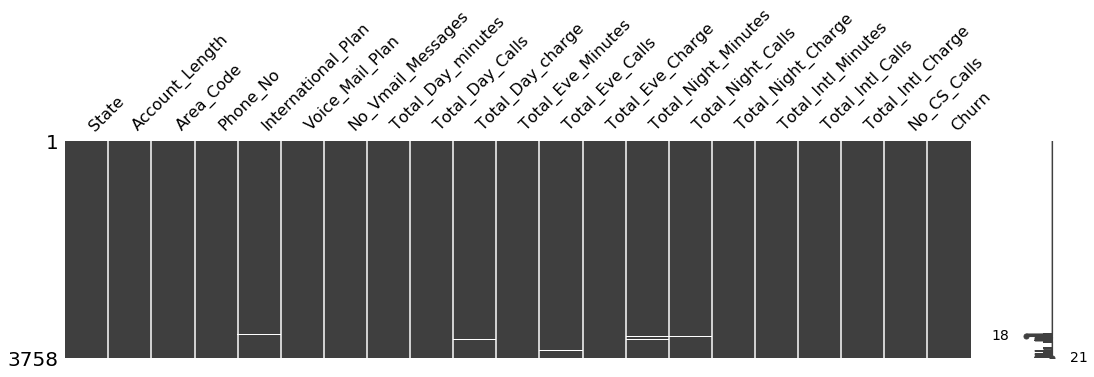

In [17]:
msno.matrix(churnData, figsize=(18,4))

In [18]:
print(churnData.isnull().sum())

State                   0
Account_Length          1
Area_Code               1
Phone_No                0
International_Plan      5
Voice_Mail_Plan         4
No_Vmail_Messages       0
Total_Day_minutes       7
Total_Day_Calls         4
Total_Day_charge       11
Total_Eve_Minutes      11
Total_Eve_Calls         4
Total_Eve_Charge        5
Total_Night_Minutes    11
Total_Night_Calls       6
Total_Night_Charge      4
Total_Intl_Minutes      3
Total_Intl_Calls        5
Total_Intl_Charge       0
No_CS_Calls             0
Churn                   0
dtype: int64


### Feature Engineering 

In [19]:
churnData['Voice_Mail_Plan'].fillna(' no',inplace=True)
churnData['International_Plan'].fillna(' no',inplace=True)
churnData['Account_Length'].fillna(churnData['Account_Length'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Intl_Calls'].fillna(churnData['Total_Intl_Calls'].mean(),inplace=True)
churnData['Total_Night_Charge'].fillna(churnData['Total_Night_Charge'].mean(),inplace=True)
churnData['Total_Night_Calls'].fillna(churnData['Total_Night_Calls'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Eve_Charge'].fillna(churnData['Total_Eve_Charge'].mean(),inplace=True)
churnData['Total_Eve_Calls'].fillna(churnData['Total_Eve_Calls'].mean(),inplace=True)
churnData['Total_Eve_Minutes'].fillna(churnData['Total_Eve_Minutes'].mean(),inplace=True)
churnData['Total_Day_charge'].fillna(churnData['Total_Day_charge'].mean(),inplace=True)
churnData['Total_Day_Calls'].fillna(churnData['Total_Day_Calls'].mean(),inplace=True)
churnData['Total_Day_minutes'].fillna(churnData['Total_Day_minutes'].mean(),inplace=True)

In [20]:
churnData['Churn'] = churnData['Churn'].astype('category')
churnData['State'] = churnData['State'].astype('category')
churnData['Voice_Mail_Plan'] = churnData['Voice_Mail_Plan'].astype('category')
churnData['International_Plan'] = churnData['International_Plan'].astype('category')

churnData['Churn'] = churnData['Churn'].cat.codes
churnData['State_cat'] = churnData['State'].cat.codes

#### One Hot Enconding - OHE

In [21]:
cols_to_transform = ['International_Plan','Voice_Mail_Plan']
churnData = pd.get_dummies(churnData, columns=cols_to_transform)

In [28]:
## Train and test separated again
churnData = churnData[['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                      'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                      'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_ no','Voice_Mail_Plan_ yes',
                       'International_Plan_ no','International_Plan_ yes','Churn']]




In [29]:
churnData.columns = ['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                    'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                    'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_no','Voice_Mail_Plan_yes',
                    'International_Plan_no','International_Plan_yes','Churn']

### Exploratoty Analysis - EDA

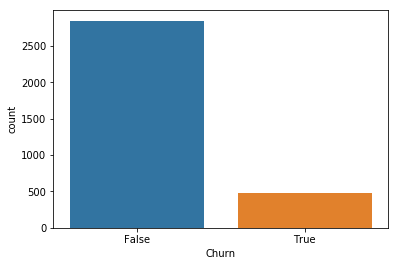

In [22]:
sns.countplot(train['Churn'])

#### Distribution Plots

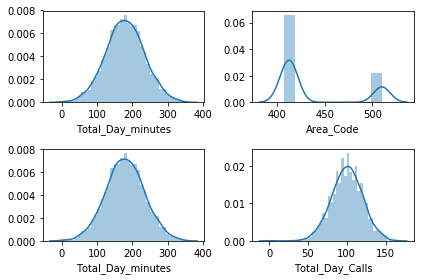

In [23]:
churnData['Area_Code'].fillna(churnData['Area_Code'].mean(), inplace=True)
churnData['No_Vmail_Messages'].fillna(churnData['No_Vmail_Messages'].mean(), inplace=True)
churnData['Total_Intl_Minutes'].fillna(churnData['Total_Intl_Minutes'].mean(), inplace=True)

fig = plt.figure()

p1 = fig.add_subplot(221)
p1 = sns.distplot(churnData['Total_Day_minutes'])


p2 = fig.add_subplot(222)
p2 = sns.distplot(churnData['Area_Code'])

p3 = fig.add_subplot(223)
p3 = sns.distplot(churnData['Total_Day_minutes'])

p4 = fig.add_subplot(224)
p4 = sns.distplot(churnData['Total_Day_Calls'])

plt.tight_layout()
fig = plt.gcf()

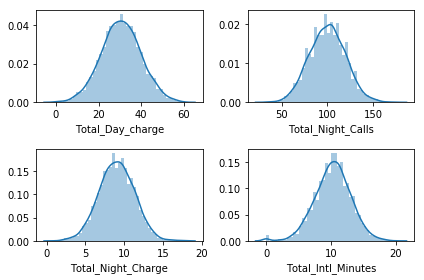

In [24]:
fig = plt.figure()
p5 = fig.add_subplot(221)
p5 = sns.distplot(churnData['Total_Day_charge'])

p6 = fig.add_subplot(222)
p5 = sns.distplot(churnData['Total_Night_Calls'])

p7 = fig.add_subplot(223)
p7 = sns.distplot(churnData['Total_Night_Charge'])

p8 = fig.add_subplot(224)
p8 = sns.distplot(churnData['Total_Intl_Minutes'])

plt.tight_layout()
fig = plt.gcf()

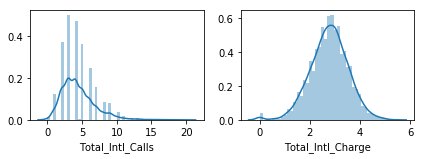

In [25]:
fig = plt.figure()
p9 = fig.add_subplot(221)
p9 = sns.distplot(churnData['Total_Intl_Calls'])

p0 = fig.add_subplot(222)
p0 = sns.distplot(churnData['Total_Intl_Charge'])

plt.tight_layout()
fig = plt.gcf()

#### Correlation plot

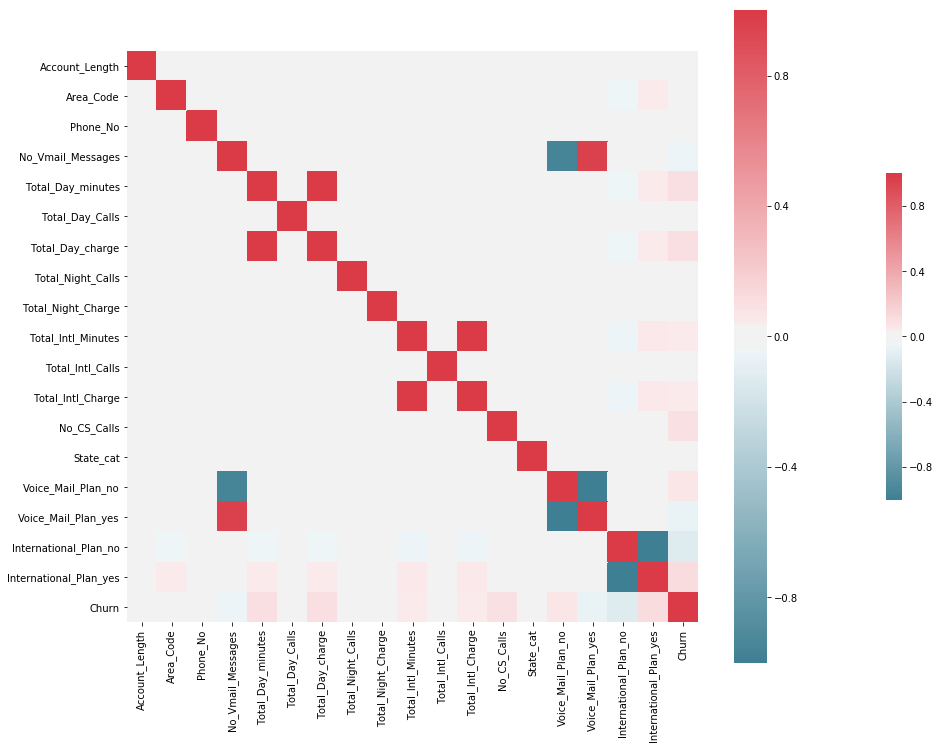

In [30]:
corr = churnData
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(16,12))
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap =cmap, vmax=1, vmin=-1, center=0, square=True, linewidth=.5,cbar_kws={"shrink":.5})
f.savefig('myimage.png', format='png', dpi=1200)
corr = churnData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)

#### Hierarquical Clustering Dendogram

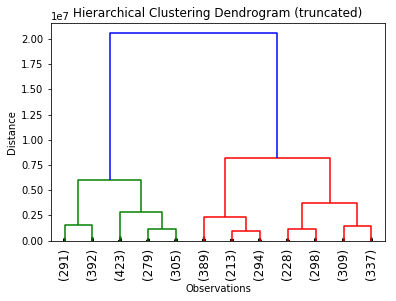

In [31]:
data_NumberClusters = churnData
data = linkage(data_NumberClusters, 'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(
data,
truncate_mode='lastp',
p=12,
show_leaf_counts='Flase',
leaf_rotation=90.,
leaf_font_size=12.,
show_contracted='Ture',)
plt.show()

#### Density

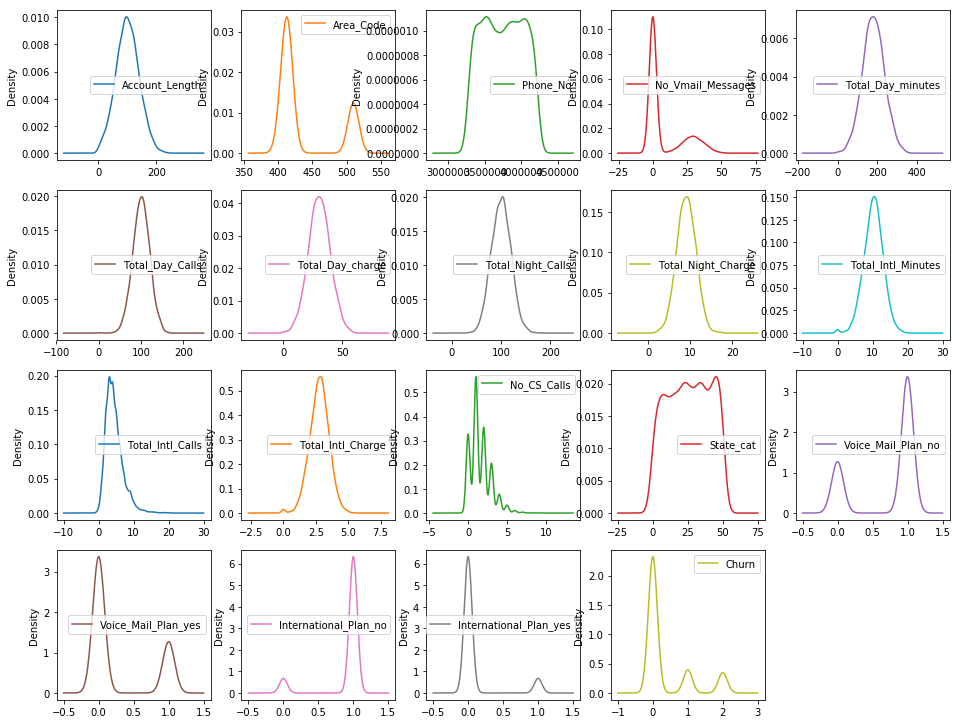

In [32]:
churnData.plot(kind='density',subplots=True,layout=(5,5), sharex=False, figsize=(16,16))
plt.show()